In [1]:
import os
import copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scienceplots
plt.style.reload_library()
plt.style.use("science")
from matplotlib import ticker
import matplotlib.colors as mcolors
import tol_colors as tc
cset =  tc.tol_cset("light")

## Convex Quadratic

In [2]:
# load data
size = 500
cq_rc_8000 = pd.read_csv(f"result/cq_cls200_{size}-{size}.csv", usecols=["Sol", "Param"])
cq_lt_8000 = pd.read_csv(f"result/cq_thd200_{size}-{size}.csv", usecols=["Sol", "Param"])

In [3]:
# fixed params
rng = np.random.RandomState(17)
Q = 0.01 * np.diag(rng.random(size=size))
p = 0.1 * rng.random(size=size)
A = rng.normal(scale=0.1, size=(size, size))

In [4]:
def calViolations(df, A):
    violations = []
    for sol, param in zip(df["Sol"], df["Param"]):
        x, b = np.array(eval(sol)), np.array(eval(param))
        violation = np.maximum(0, A @ x - b)  # Positive values indicate constraint violations
        violations.append(violation)
    return np.array(violations)

In [5]:
# compute violations for both datasets
violations_rc = calViolations(cq_rc_8000, A)
violations_lt = calViolations(cq_lt_8000, A)

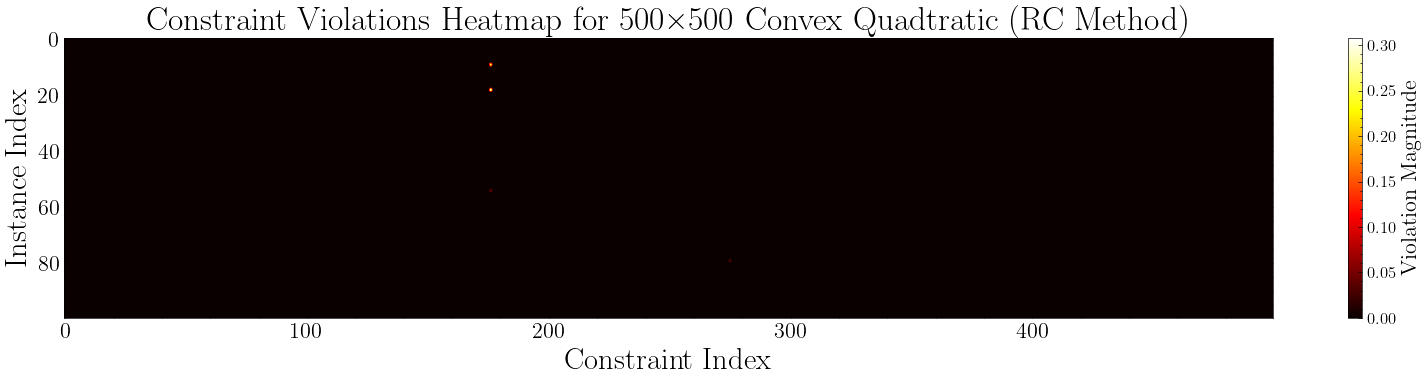

In [6]:
# visualize the violations as heatmaps
plt.figure(figsize=(16, 4))
plt.imshow(violations_rc, cmap="hot", aspect="auto")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12) 
cbar.set_label("Violation Magnitude", fontsize=16)
plt.xlabel("Constraint Index", fontsize=22)
plt.ylabel("Instance Index", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f"Constraint Violations Heatmap for {size}×{size} Convex Quadtratic (RC Method)", fontsize=24)
plt.tight_layout()
plt.savefig("./img/cq_rc_viol.pdf", dpi=300)
plt.show()

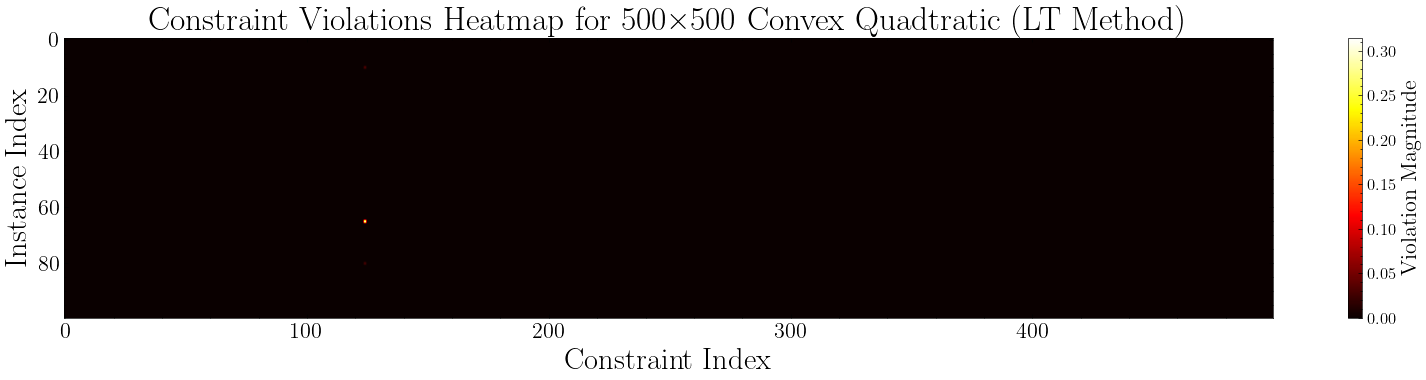

In [7]:
# visualize the violations as heatmaps
plt.figure(figsize=(16, 4))
plt.imshow(violations_lt, cmap="hot", aspect="auto")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12) 
cbar.set_label("Violation Magnitude", fontsize=16)
plt.xlabel("Constraint Index", fontsize=22)
plt.ylabel("Instance Index", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f"Constraint Violations Heatmap for {size}×{size} Convex Quadtratic (LT Method)", fontsize=24)
plt.tight_layout()
plt.savefig("./img/cq_lt_viol.pdf", dpi=300)
plt.show()

### Simple Non-Convex

In [8]:
# load data
size = 500
nc_rc_8000 = pd.read_csv(f"result/nc_cls50_{size}-{size}_new.csv", usecols=["Sol", "Param"])
nc_lt_8000 = pd.read_csv(f"result/nc_thd50_{size}-{size}_new.csv", usecols=["Sol", "Param"])

In [9]:
# random seed
import random
random.seed(42)
np.random.seed(42)

# data sample from uniform distribution
b_samples = np.random.uniform(-1, 1, size=(size, size))
d_samples = np.random.uniform(-0.1, 0.1, size=(size, size))

In [10]:
# fixed params
rng = np.random.RandomState(17)
Q = 0.01 * np.diag(rng.random(size=size))
p = 0.1 * rng.random(size=size)
A = rng.normal(scale=0.1, size=(size, size))

In [11]:
def calViolations(df, A, d_samples):
    violations = []
    for sol, param, d in zip(df["Sol"], df["Param"], d_samples):
        x, b = np.array(eval(sol)), np.array(eval(param))
        A_perturb = copy.deepcopy(A)
        A_perturb[:,0] += d
        A_perturb[:,1] -= d
        violation = np.maximum(0, A @ x - b)  # Positive values indicate constraint violations
        violations.append(violation)
    return np.array(violations)

In [12]:
# compute violations for both datasets
violations_rc = calViolations(nc_rc_8000, A, d_samples)
violations_lt = calViolations(nc_lt_8000, A, d_samples)

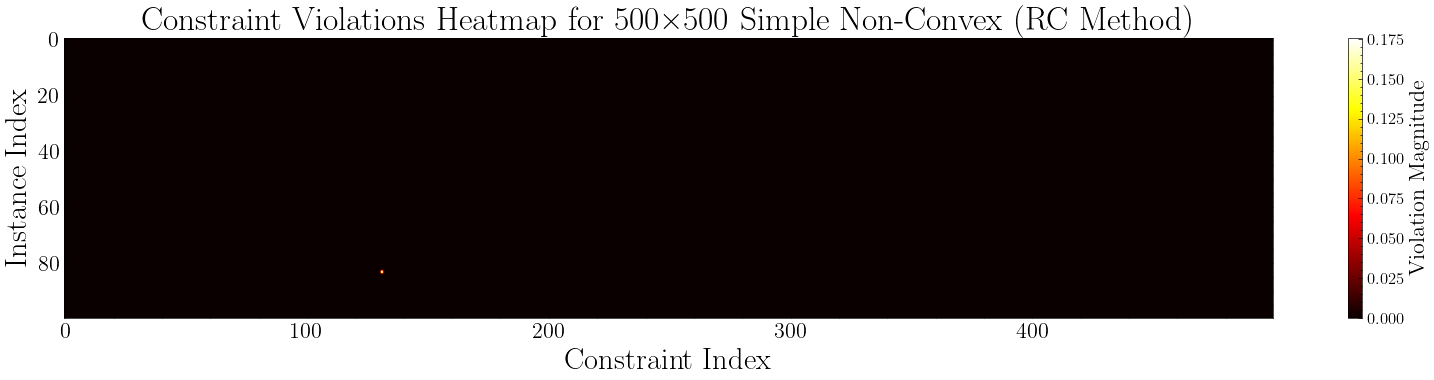

In [13]:
# visualize the violations as heatmaps
plt.figure(figsize=(16, 4))
plt.imshow(violations_rc, cmap="hot", aspect="auto")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12) 
cbar.set_label("Violation Magnitude", fontsize=16)
plt.xlabel("Constraint Index", fontsize=22)
plt.ylabel("Instance Index", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f"Constraint Violations Heatmap for {size}×{size} Simple Non-Convex (RC Method)", fontsize=24)
plt.tight_layout()
plt.savefig("./img/nc_rc_viol.pdf", dpi=300)
plt.show()

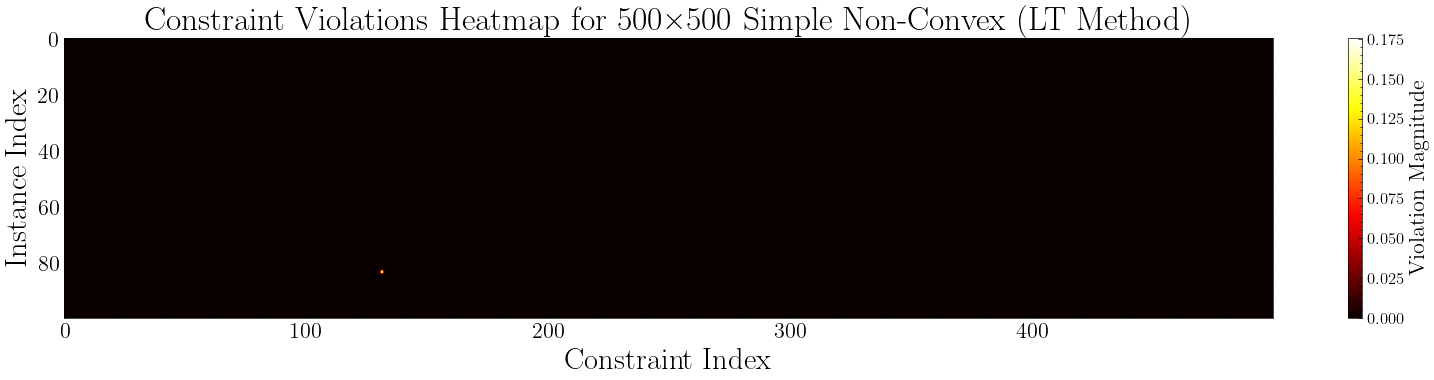

In [14]:
# visualize the violations as heatmaps
plt.figure(figsize=(16, 4))
plt.imshow(violations_rc, cmap="hot", aspect="auto")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12) 
cbar.set_label("Violation Magnitude", fontsize=16)
plt.xlabel("Constraint Index", fontsize=22)
plt.ylabel("Instance Index", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(f"Constraint Violations Heatmap for {size}×{size} Simple Non-Convex (LT Method)", fontsize=24)
plt.tight_layout()
plt.savefig("./img/nc_lt_viol.pdf", dpi=300)
plt.show()

### Rosenbrock

In [15]:
# load data
size = 10000
rb_rc_8000 = pd.read_csv(f"result/rb_cls100_{size}.csv", usecols=["Sol", "Param"])
rb_lt_8000 = pd.read_csv(f"result/rb_thd100_{size}.csv", usecols=["Sol", "Param"])

In [16]:
# fixed params
rng = np.random.RandomState(17)
p = rng.normal(scale=1, size=size)
q = rng.normal(scale=1, size=size)

In [17]:
def calViolations(df, p, q):
    violations = []
    for sol, param in zip(df["Sol"], df["Param"]):
        x, param = np.array(eval(sol)), np.array(eval(param))
        a, b = param[:-1], param[-1]
        # calulate violations
        violation = []
        violation.append(max(np.sum(x[::2] ** 2) - len(a) * b - 1e-5, 0))
        violation.append(max(len(a) * b / 2- np.sum(x[::2] ** 2) - 1e-5, 0))
        violation.append(max(x[0::2] @ p - 1e-5, 0))
        violation.append(max(x[1::2] @ q - 1e-5, 0))
        violations.append(violation)
    return np.array(violations)

In [18]:
# compute violations for both datasets
violations_rc = calViolations(rb_rc_8000, p, q)
violations_lt = calViolations(rb_lt_8000, p, q)

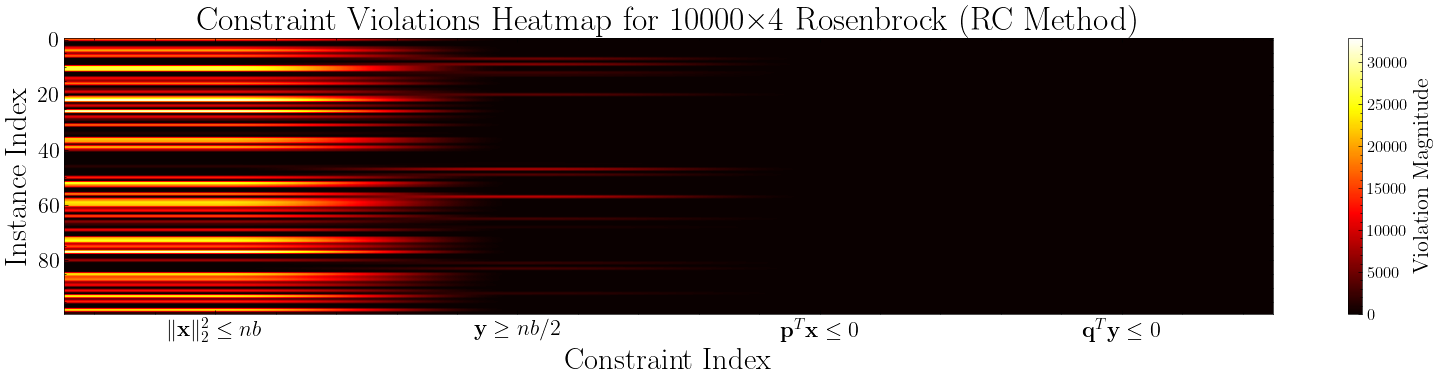

In [19]:
# visualize the violations as heatmaps
plt.figure(figsize=(16, 4))
plt.imshow(violations_rc, cmap="hot", aspect="auto")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12) 
cbar.set_label("Violation Magnitude", fontsize=16)
plt.xlabel("Constraint Index", fontsize=22)
plt.ylabel("Instance Index", fontsize=22)
constraint_labels = ["$\| \mathbf{x} \|_2^2 \leq n b$", "$\mathbf{y} \geq nb/2$", 
                     "$\mathbf{p}^T \mathbf{x} \leq 0$", "$\mathbf{q}^T \mathbf{y} \leq 0$"]
plt.xticks(ticks=np.arange(len(constraint_labels)), labels=constraint_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.title("Constraint Violations Heatmap for 10000×4 Rosenbrock (RC Method)", fontsize=24)
plt.tight_layout()
plt.savefig("./img/rb_rc_viol.pdf", dpi=300)
plt.show()

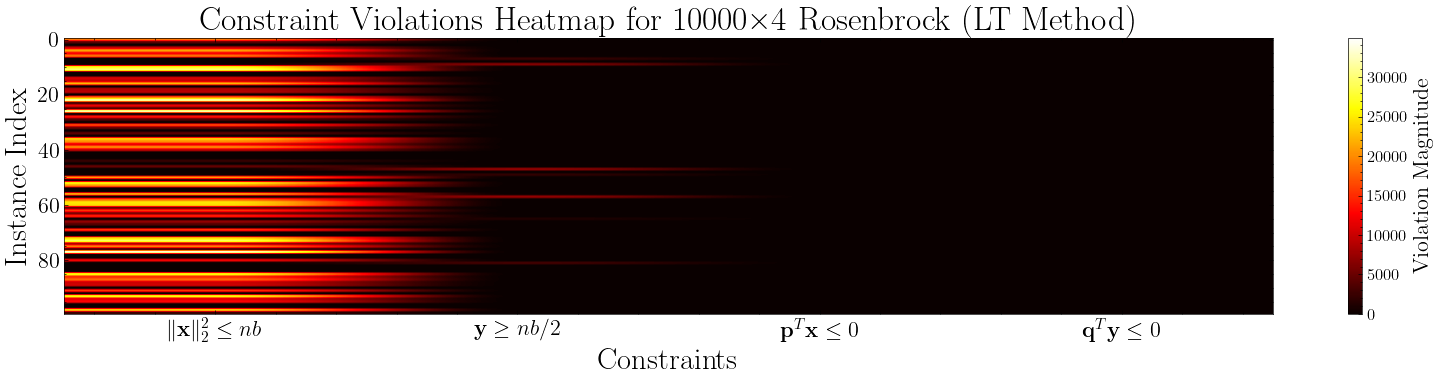

In [20]:
# visualize the violations as heatmaps
plt.figure(figsize=(16, 4))
plt.imshow(violations_lt, cmap="hot", aspect="auto")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12) 
cbar.set_label("Violation Magnitude", fontsize=16)
plt.xlabel("Constraints", fontsize=22)
plt.ylabel("Instance Index", fontsize=22)
constraint_labels = ["$\| \mathbf{x} \|_2^2 \leq n b$", "$\mathbf{y} \geq nb/2$", 
                     "$\mathbf{p}^T \mathbf{x} \leq 0$", "$\mathbf{q}^T \mathbf{y} \leq 0$"]
plt.xticks(ticks=np.arange(len(constraint_labels)), labels=constraint_labels, fontsize=16)
plt.yticks(fontsize=16)
plt.title("Constraint Violations Heatmap for 10000×4 Rosenbrock (LT Method)", fontsize=24)
plt.tight_layout()
plt.savefig("./img/rb_lt_viol.pdf", dpi=300)
plt.show()